# Final Machine Learning Project

## 1. Introduction


The goal of this project is to show my understanding of the learned algorithms during the ADS minor.
For this, i will be looking into the Video game sales with ratings dataset from kaggle. (https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/version/2)

I will apply the learned algorithms to learn more about following hypotheses:
    1. Does the critic score, User score or a combination of those have a causal relationship with game sales?
    2. Does the number of users and critics have a causal relationship with game sales? 
    3. Is there a difference in the causal relationship between platform/genre/publisher/developer and game sales in different countries?
    4. Does the platform, genre, publisher, developer, release year, ESRB rating(age rating E.g. Teen) or a combination of those have a causal relationship with game sales?

The goal i wish to achieve with this dataset and hypothesis is to be able to create a model that can predict whether a game will be successful.

## 2. Preparing the Dataset with pandas

First we have to prepare out dataset so we can use it for our machine learning algorithms.

### 2.1 Loading the dataset

In [98]:
import pandas as pd
import numpy as np

original_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', header = 0)
df = original_df.copy()
df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


### 2.2 Column descriptions

Name: Name of the game

Platform: Console on which the game is running

Year_of_Release: Year that the game is released

Genre: Game's category

Publisher: Game's publisher

NA_sales: Game sales in North America (in millions of units)

EU_Sales: Game sales in the European Union (in millions of units)

JP_Sales: Game sales in Japan (in millions of units)

Other_Sales: Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the E.U. and South America (in millions of units)

Global_Sales: Total sales in the world (in millions of units)

Critic_Score: Aggregate score compiled by Metacritic staff

Critic_Count: The number of critics used in coming up with the Critic_score

User_Score: Score by Metacritic's subscribers

User_Count: Number of users who gave the user_score

Developer: Party responsible for creating the game

Rating: The ESRB ratings (E.g. Everyone, Teen, Adults Only..etc)


### 2.3 Investigate the dataset

In [99]:
# Show the Dtypes of all features
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [100]:
# Show the amount of records the dataset contains and how many values are present for each feature.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [101]:
# Show information such as count, mean, std for all the numerical features
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


### 2.4 Transforming the Data

First we have to change our user_score from object to float, as you can see in the previous chapter, user_score is weirdly a string, while it only contains values such as 8.2, just like critic_score.

Transform the values in the dataframe into the shape we need for machine learning. First of all, it's hard to run 
analysis on the string values E.g. Nintendo. 

In [102]:
df['Platform_Id'] = 1
df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_Id
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,1
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1


Now we transform the string values to numerical for each of the previous 5 mentioned features.

In [103]:
# First we have to know what all the possibles values are.
# df.head(3)
platform_values = df['Platform'].unique()
platform_values

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [104]:
#We now can create a dictionary with these values and then give new values to the previous created columns through mapping
platform_dict = dict(enumerate(platform_values))
# platform_dict

In [105]:
# We can use the following to switch the values around, as our target values are the numbers.
platform_dict_switched = {y:x for x, y in platform_dict.items()}
platform_dict_switched

{'Wii': 0,
 'NES': 1,
 'GB': 2,
 'DS': 3,
 'X360': 4,
 'PS3': 5,
 'PS2': 6,
 'SNES': 7,
 'GBA': 8,
 'PS4': 9,
 '3DS': 10,
 'N64': 11,
 'PS': 12,
 'XB': 13,
 'PC': 14,
 '2600': 15,
 'PSP': 16,
 'XOne': 17,
 'WiiU': 18,
 'GC': 19,
 'GEN': 20,
 'DC': 21,
 'PSV': 22,
 'SAT': 23,
 'SCD': 24,
 'WS': 25,
 'NG': 26,
 'TG16': 27,
 '3DO': 28,
 'GG': 29,
 'PCFX': 30}

In [106]:
# Map Platform_Id column with the new dictionary
df['Platform_Id'] = df['Platform'].map(platform_dict_switched).astype(int)
df['Platform_Id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype=int64)

In [107]:
# Repeat this for the other 4 features

def create_dict(column_name):
    new_column = column_name + '_Id'
    df[new_column] = 1
    values = df[column_name].unique()
    values_dict = dict(enumerate(values))
    values_dict_switched = {y:x for x, y in values_dict.items()}
    df[new_column] = df[column_name].map(values_dict_switched).astype(int)

df.head()
create_dict('Genre')
create_dict('Publisher')
create_dict('Developer')
create_dict('Rating')

df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Critic_Count,User_Score,User_Count,Developer,Rating,Platform_Id,Genre_Id,Publisher_Id,Developer_Id,Rating_Id
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,51.0,8,322.0,Nintendo,E,0,0,0,0,0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,NaN,NaN,NaN,NaN,NaN,1,1,0,1,1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,73.0,8.3,709.0,Nintendo,E,0,2,0,0,0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,73.0,8,192.0,Nintendo,E,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,NaN,NaN,NaN,NaN,NaN,2,3,0,1,1


### 2.5 Deal with Missing Values

In [108]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Now it's time to deal with the missing values. Why? Simply because most machine learning will need a complete set of 
values in that column to use it. By filling it in with guesses, we'll be introducing some noise into a model, but if we can 
keep our guesses reasonable, some of them should be close to the historical truth (whatever it was...), and the overall 
predictive power of age might still make a better model than before. 

Before we can create models, we have to decide how to handle the missing values, as ML algorithms expect no empty values.

In [109]:
# Lets take a look at out empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 21 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
Platform_Id        16719 non-null int32
Genre_Id           16719 non-null int32
Publisher_Id       16719 non-null int32
Developer_Id       16719 non-null int32
Rating_Id          16719 non-null int32
dtypes: float64(9), int32(5), 

As you can see, some miss very few values such as name, year of release, genre, publisher. For those features we can just remove the empty values as missing that amount of records won't affect creating our model.
Features such as user_score and the connected user_count miss quite a few values, the same counts for critic_score and critic_count. Besides that Developer and Rating also miss quite a few records.
What we for each feature is to take an average score for each genre for example and fill those empty values, another option which is less recommended is to not use the rows with the empty values when you need those values.
The most recommended option would be to find a dataset and supplement the missing data, as the data should be available online. 

What i will be doing for this project is removing the rows with empty values when those values are needed. The reason for this is because finding another dataset to supplement the empty values is not the goal for this project, ML, but for GCD.
To show my knowledge about machine learning and create a basic model, ~7000 rows should suffice.

In [110]:
df=df.dropna()
print('After removing empty values')

df.info()

After removing empty values
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 21 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
Platform_Id        6825 non-null int32
Genre_Id           6825 non-null int32
Publisher_Id       6825 non-null int32
Developer_Id       6825 non-null int32
Rating_Id          6825 non-null int32
dtypes: float64(9), 

What was noticed, is that User_Score is an object instead of a float, this is because it used to contain values such as tbd, which were removed after dropping NaNs. To make pandas read the column values as float we can do the following

In [111]:
df['User_Score'] = df['User_Score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 21 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null float64
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
Platform_Id        6825 non-null int32
Genre_Id           6825 non-null int32
Publisher_Id       6825 non-null int32
Developer_Id       6825 non-null int32
Rating_Id          6825 non-null int32
dtypes: float64(10), int32(5), object(6)
memory

### 2.6 Hot encoding

1 problem that got added when we transformed out categorical data to numerical is that there now is an ordering to it. The machine learning algorithm will weight the values improperly instead of it weighing whether or not a game is from a specific genre for example. To counter this we can make use of Hot encoding, which basically splits up all the categories into new columns containing 0's and 1's meaning false and true. This can be done for the columns Platform, Genre and Rating. As there are only like 10-20 values different kind of values for each column, which is still doable. There exists a problem for publisher and publisher and developer though, as there exists more than 100 different kinds of values. If you were to binarize this, you would never get all or most possible combinations, this messes up the model as the possible combinations become too large for our dataset.

Because of this reason, i will just use the id of the publishers and developers to improve the models as i have few features, even though it might be biased.

In [112]:
# Save the to be hot encoded columns, as the following method removes the referenced column, even if it isnt supposed to do so
saved_columns = df[['Platform', 'Genre', 'Rating']]

df = pd.get_dummies(df, columns=['Platform'], prefix = ['Platform'], drop_first=False)
df = pd.get_dummies(df, columns=['Genre'], prefix = ['Genre'], drop_first=False)
df = pd.get_dummies(df, columns=['Rating'], prefix = ['Rating'], drop_first=False)

df = pd.concat([df, saved_columns], axis=1, sort=False)
df.head()

,Name,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T,Platform,Genre,Rating
0,Wii Sports,2006.0,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,...,0,1,0,0,0,0,0,Wii,Sports,E
2,Mario Kart Wii,2008.0,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,...,0,1,0,0,0,0,0,Wii,Racing,E
3,Wii Sports Resort,2009.0,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,...,0,1,0,0,0,0,0,Wii,Sports,E
6,New Super Mario Bros.,2006.0,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,...,0,1,0,0,0,0,0,DS,Platform,E
7,Wii Play,2006.0,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,...,0,1,0,0,0,0,0,Wii,Misc,E


### 2.7 Plotting the dataset

Some simple plots

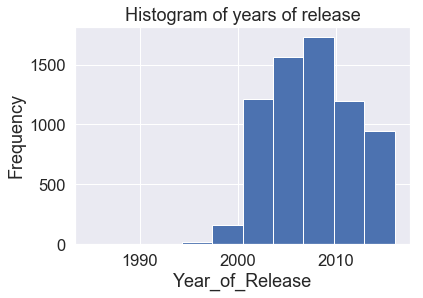

Most of our game sales data was between 2005 and 2010


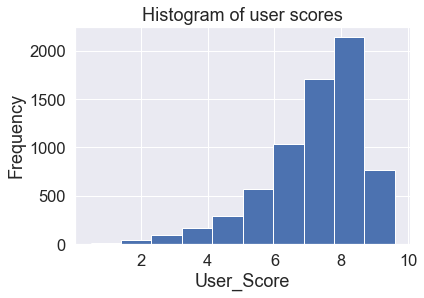

an Higher user score is more common till the user score of 8. This probably means that people dont mind giving something an 8, but become very picky when its above that.


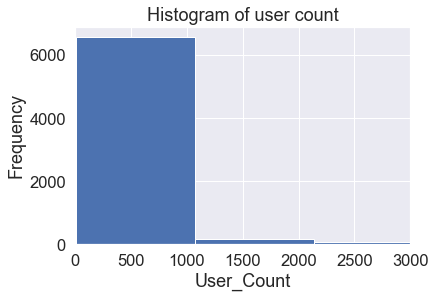

Most games had around 1000 users score it


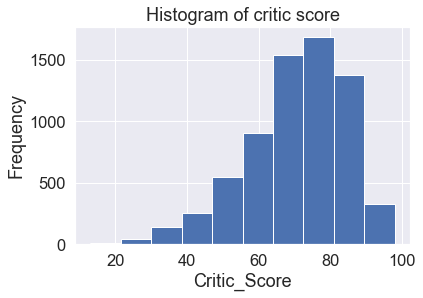

Critics had the same way of scoring as the users did


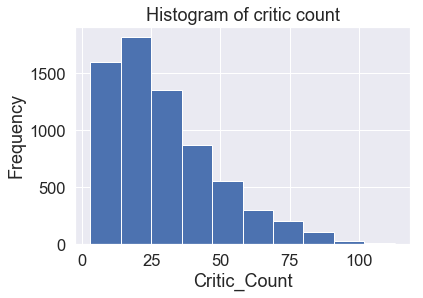

Far less critics per game than users, which is obvious
Publishers count
Electronic Arts                           944
Ubisoft                                   496
Activision                                492
Sony Computer Entertainment               316
THQ                                       307
Nintendo                                  291
Sega                                      284
Take-Two Interactive                      273
Konami Digital Entertainment              244
Namco Bandai Games                        239
Capcom                                    197
Atari                                     176
Microsoft Game Studios                    141
Tecmo Koei                                137
Square Enix                               134
Warner Bros. Interactive Entertainment    130
Eidos Interactive                         123
Vivendi Games                             113
Codemasters                               111
Midway Games                              103
505 Game

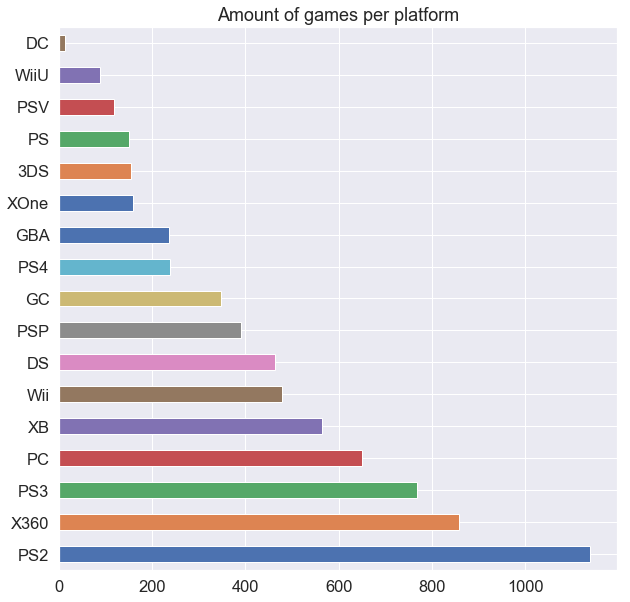

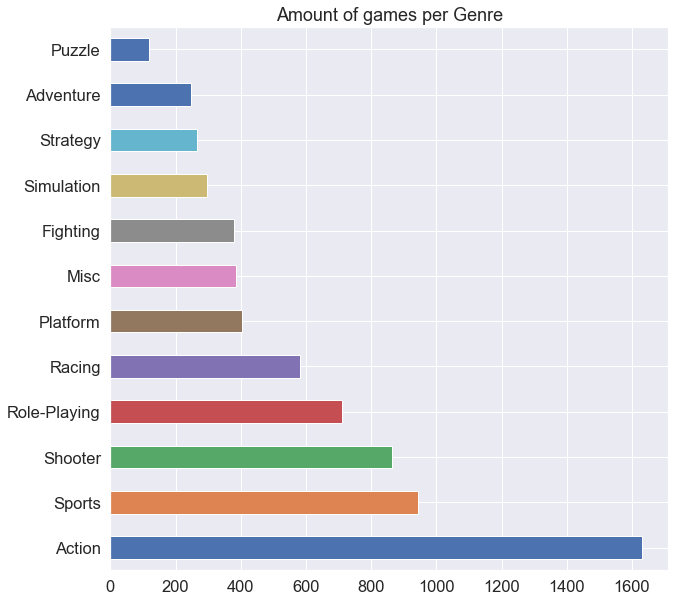

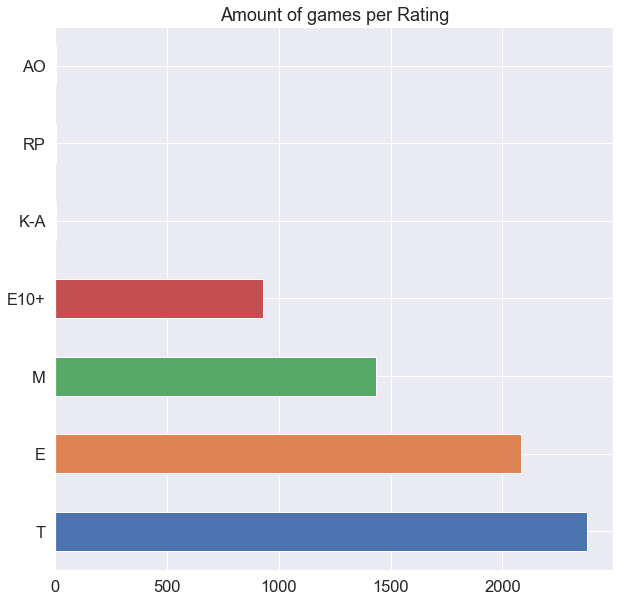

Developers count


EA Canada                            149
EA Sports                            142
Capcom                               126
Ubisoft                              103
Konami                                95
Ubisoft Montreal                      87
EA Tiburon                            82
Omega Force                           69
Visual Concepts                       68
Nintendo                              68
Electronic Arts                       67
Traveller's Tales                     59
Codemasters                           57
Vicarious Visions                     57
Namco                                 55
Yuke's                                48
TT Games                              43
Maxis                                 42
Neversoft Entertainment               42
Midway                                42
Treyarch                              41
From Software                         41
Eurocom Entertainment Software        40
Square Enix                           39
Sonic Team      

In [113]:
import pylab as pyl
import matplotlib.pyplot as plt
import seaborn as sns

df['Year_of_Release'].plot.hist()
pyl.title("Histogram of years of release")
pyl.xlabel("Year_of_Release")
pyl.show()
print('Most of our game sales data was between 2005 and 2010')

df['User_Score'].plot.hist()
pyl.title("Histogram of user scores")
pyl.xlabel("User_Score")
pyl.show()
print('an Higher user score is more common till the user score of 8. This probably means that people dont mind giving something an 8, but become very picky when its above that.')

df['User_Count'].plot.hist(xlim=(0, 3000))
pyl.title("Histogram of user count")
pyl.xlabel("User_Count")
pyl.show()
print('Most games had around 1000 users score it')

df['Critic_Score'].plot.hist()
pyl.title("Histogram of critic score")
pyl.xlabel("Critic_Score")
pyl.show()
print('Critics had the same way of scoring as the users did')

df['Critic_Count'].plot.hist()
pyl.title("Histogram of critic count")
pyl.xlabel("Critic_Count")
pyl.show()
print('Far less critics per game than users, which is obvious')

temp = df['Publisher']
temp = temp.value_counts()
print('Publishers count')
print(temp)

temp = df['Platform']
temp = temp.value_counts()
temp.plot.barh(figsize=(10, 10), title='Amount of games per platform')
pyl.show()

temp = df['Genre']
temp = temp.value_counts()
temp.plot.barh(figsize=(10, 10), title='Amount of games per Genre')
pyl.show()

temp = df['Rating']
temp = temp.value_counts()
temp.plot.barh(figsize=(10, 10), title='Amount of games per Rating')
pyl.show()

temp = df['Developer']
temp = temp.value_counts()
print('Developers count')
temp

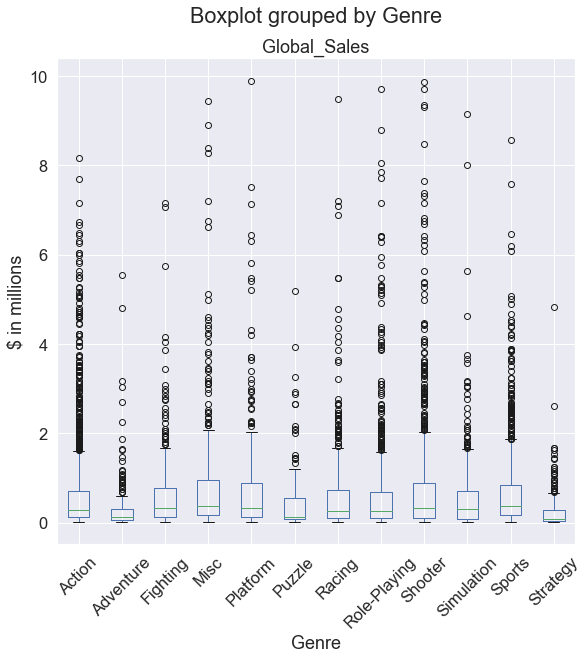

In [114]:
temp = df[['Global_Sales', 'Genre']]
# df['goal_divided_by_1000'] = df['usd_goal_real'].div(100).round(1)
temp = temp[temp['Global_Sales'] < 10]
fig, ax = plt.subplots(figsize=(9,  9))
ax.set_ylabel("$ in millions")
temp.boxplot(['Global_Sales'], 'Genre', ax, rot=45)


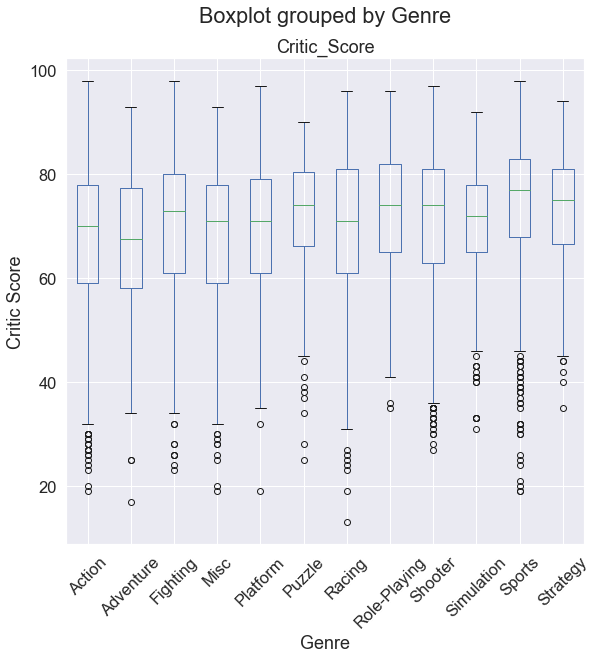

In [115]:
temp = df[['Critic_Score', 'Genre']]
# df['goal_divided_by_1000'] = df['usd_goal_real'].div(100).round(1)
# temp = temp[temp['Critic_Score'] < 20]
fig, ax = plt.subplots(figsize=(9,  9))
ax.set_ylabel("Critic Score")
temp.boxplot(['Critic_Score'], 'Genre', ax, rot=45)


Here you see the distribution of the genres with many outliers removed. You can see that they are all quite similar with perhaps some small changes. E.g. Simulation genre had the highest lowest average critic score.

Text(0,0.5,'Critic score')

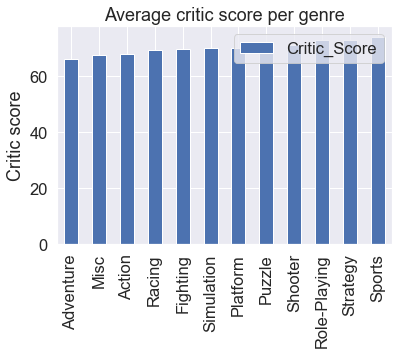

In [123]:
avg_critic_score_per_genre = df.groupby('Genre').agg({'Critic_Score': np.mean})
# catRatio['ratio'] = catRatio['pledged'] / catRatio['goal']
# catRatio['ratio'].sort_values(ascending=False).plot(kind='bar', color='#330136')
# plt.title('Pledged to Goal Ratio on Kickstarter')
# plt.xlabel('')
# plt.ylabel('Pledged / Goal Ratio')
avg_critic_score_per_genre.sort_values('Critic_Score').plot.bar()
plt.title('Average critic score per genre')
plt.xlabel('')
plt.ylabel('Critic score')

## 3. Analyse

We will now apply algorithms to the dataset and compare the results at the end.
For each algorithm we will store the accuracy, recall, precision and f1 score for both the training and test set.

In [124]:
scores = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1 Score'])

Libraries and methods we can use to calculate the previous mentioned stuff, a method to calculate R2, mean squared error and mean absolute error and a method that creates a learning curve for underfitting and overfitting.

### 3.1 Linear Regression


Linear regression is a regression algorithm where the dependable variable (target) *y* is a linear combination of the parameters (features). It creates a model based on the coefficient that was found, this model can then be used for future predictions. As we are working with a coefficient, linear regression only accepts numerical data.

#### 3.1.1 Feature selection

We first have to select the features which we want to use, our goal to find out for this algorithm is how accurate it will be able to predict our global sales.

Thus we select the critic and user scores and counts together with the sales in the different regions accross the world.

In [125]:
temp_df = df.copy()
# Columns which we might use for our regression, besides this we also need the binarized categories.
variables = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Publisher_Id', 'Developer_Id']
possible_targets = ['Other_Sales', 'JP_Sales', 'EU_Sales', 'NA_Sales', 'Global_Sales']
columns1 = variables + possible_targets

In [126]:
nparray = temp_df.columns
columns2 = nparray.tolist()
columns2 = [x if str.__contains__(x, 'Platform_') else (x if str.__contains__(x, 'Genre_') else (x if str.__contains__(x, 'Rating_') else None)) for x in nparray]
columns2 = [x for x in columns2 if x is not None]
columns2[:5]

['Platform_Id', 'Genre_Id', 'Rating_Id', 'Platform_3DS', 'Platform_DC']

In [127]:
#Remove Platform_id, Genre_id, Rating_id as they are not needed
columns2.remove('Platform_Id')
columns2.remove('Genre_Id')
columns2.remove('Rating_Id')
columns2[:5]

['Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC']

In [128]:
#Combine the 2 columns
columns = columns1 + columns2
temp_df = temp_df[columns]
temp_df.head()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Publisher_Id,Developer_Id,Other_Sales,JP_Sales,EU_Sales,...,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,76.0,51.0,8.0,322.0,0,0,8.45,3.77,28.96,...,0,1,0,0,1,0,0,0,0,0
2,2008.0,82.0,73.0,8.3,709.0,0,0,3.29,3.79,12.76,...,0,0,0,0,1,0,0,0,0,0
3,2009.0,80.0,73.0,8.0,192.0,0,0,2.95,3.28,10.93,...,0,1,0,0,1,0,0,0,0,0
6,2006.0,89.0,65.0,8.5,431.0,0,0,2.88,6.50,9.14,...,0,0,0,0,1,0,0,0,0,0
7,2006.0,58.0,41.0,6.6,129.0,0,0,2.84,2.93,9.18,...,0,0,0,0,1,0,0,0,0,0


#### 3.1.2 Plot relationships

##### Show the relationship between the different variables and the target features

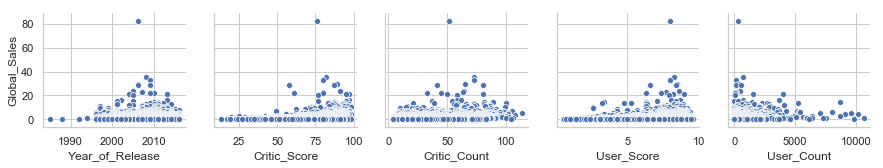

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.pairplot(temp_df, x_vars=['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'], y_vars=['Global_Sales'], height=2.5);
plt.show()

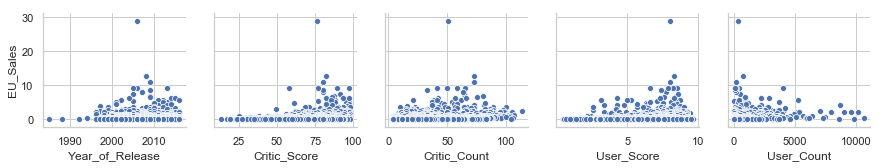

In [130]:
sns.pairplot(temp_df, x_vars=['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'], y_vars=['EU_Sales'], height=2.5);
plt.show()

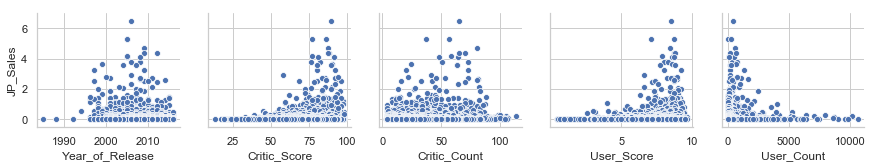

In [131]:
sns.pairplot(temp_df, x_vars=['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'], y_vars=['JP_Sales'], height=2.5);
plt.show()

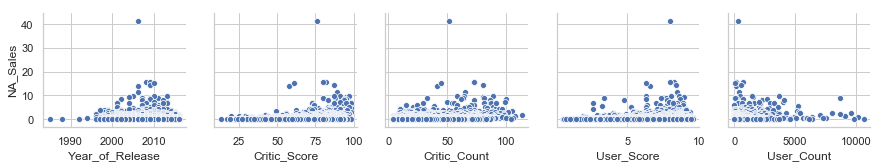

In [132]:
sns.pairplot(temp_df, x_vars=['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'], y_vars=['NA_Sales'], height=2.5);
plt.show()

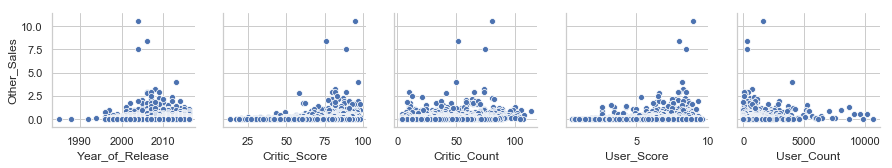

In [133]:
sns.pairplot(temp_df, x_vars=['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'], y_vars=['Other_Sales'], height=2.5);
plt.show()

As you see, in general the relationship between the 4 train features and the target features are similar. We do notice that there are some extreme outliers and that our data is very skewed, which makes it hard to see the relationship between them. To make these patterns more discernable, we can use **Log transformation** to make our data less skewed.

#### 3.1.3 Log transformation

In [134]:
def log_trans(df, col):
    """ Transforms the values of a column
    to their natural logarithm (ln(x)).
    """
    df_copy = df.copy(deep=True)

    # Apply a natural log transformation to all values
    df_copy[col] = np.log(df_copy[col])

    return df_copy


#### 3.1.4 Plot relationships after log transformation

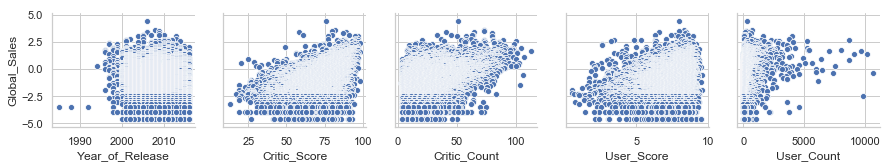

In [135]:
transformed_temp_df = log_trans(temp_df[temp_df['Global_Sales'] != 0], 'Global_Sales')
sns.set(style='whitegrid', context='notebook')
sns.pairplot(transformed_temp_df, x_vars=['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'], y_vars=['Global_Sales'], height=2.5);
plt.show()

As you can see, it became much easier to see the relationship between global sales and the different variables

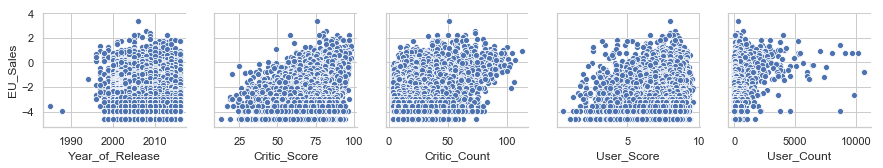

In [136]:
transformed_temp_df = log_trans(temp_df[temp_df['EU_Sales'] != 0], 'EU_Sales')
sns.set(style='whitegrid', context='notebook')
sns.pairplot(transformed_temp_df, x_vars=['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'], y_vars=['EU_Sales'], height=2.5);
plt.show()

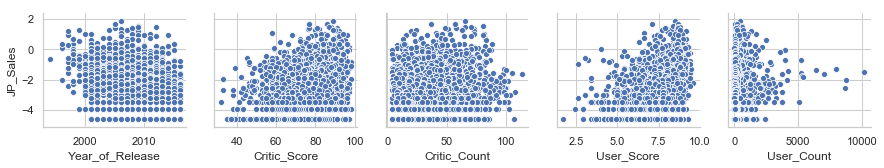

In [137]:
transformed_temp_df = log_trans(temp_df[temp_df['JP_Sales'] != 0], 'JP_Sales')
sns.set(style='whitegrid', context='notebook')
sns.pairplot(transformed_temp_df, x_vars=['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'], y_vars=['JP_Sales'], height=2.5);
plt.show()

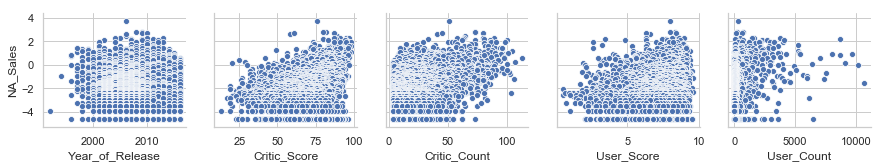

In [138]:
transformed_temp_df = log_trans(temp_df[temp_df['NA_Sales'] != 0], 'NA_Sales')
sns.set(style='whitegrid', context='notebook')
sns.pairplot(transformed_temp_df, x_vars=['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'], y_vars=['NA_Sales'], height=2.5);
plt.show()

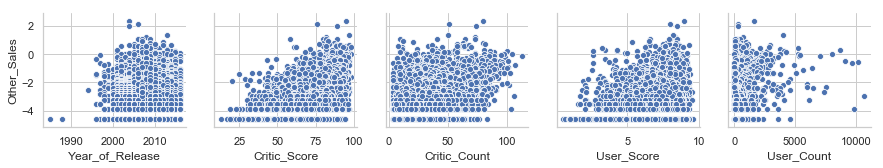

In [139]:
# Make sure that other sales does not contain any 0's meaning the amount of sales for that specific game was not even 0.01. This causes log transformation to divide by 0
transformed_temp_df = log_trans(temp_df[temp_df['Other_Sales'] != 0], 'Other_Sales')
sns.set(style='whitegrid', context='notebook')
sns.pairplot(transformed_temp_df, x_vars=['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'], y_vars=['Other_Sales'], height=2.5);
plt.show()

As expected, the sales in the different regions is still very similar, but we do notice some differences better.

#### 3.1.5 Heatmap

Below is the heatmap that shows the correlation coffiencents of all the variables against each other. The numbers indicate the correlation from -1 to 1 where 0 indicates no influence, -1 indicates a negative influence and 1 indicates a positive influence.

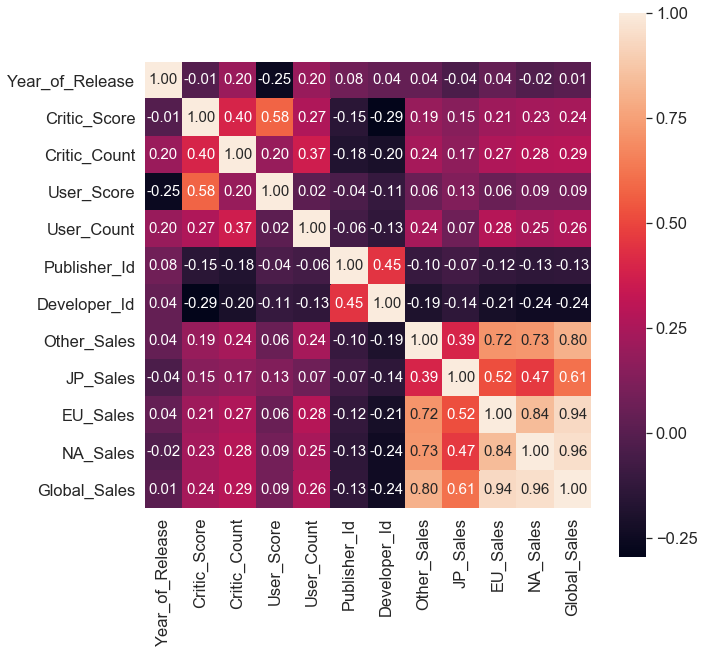

In [140]:
# This has to be done as it seems, User_Score is in an object type instead of a float.
temp_df['User_Score'] = temp_df['User_Score'].astype(float)

#Don't include columns2, which contains the binarized categories, as it would make the heatmap too large.
cm = np.corrcoef(temp_df[columns1].values, rowvar=0)

plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=columns1,
    xticklabels=columns1)
plt.show()

As you can see, only a few coefficients connected to year_of_release and nearly all the ones connected to published id and developer id go in the negatives. This means that all except those variables have either a neutral influence on the target features or a positive influence

#### 3.1.6 Set features and target

In [141]:
# Import modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [142]:
# Set features
all_features = variables + columns2
X = temp_df[all_features]
X.head()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Publisher_Id,Developer_Id,Platform_3DS,Platform_DC,Platform_DS,...,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,76.0,51.0,8.0,322.0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2008.0,82.0,73.0,8.3,709.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2009.0,80.0,73.0,8.0,192.0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,2006.0,89.0,65.0,8.5,431.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7,2006.0,58.0,41.0,6.6,129.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [143]:
# Set target
y = temp_df['Global_Sales']
y.head()

0    82.53
2    35.52
3    32.77
6    29.80
7    28.92
Name: Global_Sales, dtype: float64

#### 3.1.6 Scale features


In [144]:
scaler = MinMaxScaler([0, 1])
X_scaled = scaler.fit_transform(X)


#### 3.1.7 Split into training and testing sets

In [145]:
# Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)
X.shape

(6825, 43)

#### 3.1.8 Features evaluation


As we have 43 features at the moment, we should try to reduce the amount as the dimensionality is too high for the size of the dataset. It is high likely that not all the features matter much, to reduce them we can make use of feature selection RFECV

##### Perform RFECV

In [146]:
# Import RFECV algorithm
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [147]:
lr_estimator = LinearRegression() 

In [148]:
# Instantiate the RFECV algorithm
f_selector = RFECV(estimator=lr_estimator,
                   step=1,
                   cv=5,
                   scoring='r2',
                   n_jobs=-1)

In [149]:
# Fit the RFECV algorithm
f_selector = f_selector.fit(X_train, y_train)

In [150]:
f_selector.grid_scores_

array([ 9.11436186e-02,  1.47582877e-01,  1.84590647e-01,  1.96666229e-01,
        1.96381788e-01,  2.05702048e-01,  2.12999179e-01,  2.18051087e-01,
        2.18058889e-01,  2.19571155e-01,  2.26050708e-01,  2.28129797e-01,
        2.27802142e-01,  2.29876654e-01,  2.31633368e-01,  2.33829249e-01,
        2.35648778e-01,  2.36081745e-01,  2.38280777e-01,  2.40060122e-01,
        2.40727479e-01,  2.40869441e-01,  2.40685387e-01,  2.40823482e-01,
        2.41546883e-01, -5.51055504e+21, -2.80589878e+22,  2.42755502e-01,
       -2.57682342e+23,  2.43930836e-01, -1.16459203e+19, -5.86549358e+23,
       -1.63316577e+20, -2.94015586e+19,  2.43579065e-01,  2.43599330e-01,
        2.43732520e-01,  2.43722237e-01, -1.16704252e+21, -6.00531568e+21,
       -1.61601446e+21, -5.58807575e+21, -3.60113374e+21])

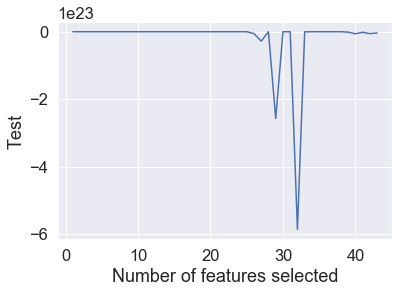

In [151]:
# Plot number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Test")
plt.plot(range(1, len(f_selector.grid_scores_) + 1), f_selector.grid_scores_)
plt.show()

In [152]:
# Show best number of features
print('Optimal number of features: %i' % (f_selector.n_features_))

Optimal number of features: 30


In [153]:
# Create a dataframe that shows the ranking of features
def create_ranking_df(ranking_list, columns):
    ranking = {}
    for i in range(len(ranking_list)):
        rank = ranking_list[i]
        col = columns[i]
        if rank in ranking:
            ranking[rank].append(col)
        else:
            ranking[rank] = [col]
    ranking = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in ranking.items()]))
    return ranking.reindex(sorted(ranking.columns), axis=1)

In [154]:
# Show ranking
ranking = create_ranking_df(f_selector.ranking_, X.columns)
ranking

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Year_of_Release,Platform_WiiU,Rating_AO,Genre_Platform,Genre_Racing,Platform_PSV,Rating_E,Genre_Shooter,Platform_GBA,Platform_PSP,Platform_X360,Genre_Fighting,Genre_Action,Platform_PS4
1,Critic_Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Critic_Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,User_Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,User_Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Publisher_Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Developer_Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Platform_3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Platform_DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Platform_DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.1.9 Use selected featues

In [155]:
best_features = [i for i, rank in enumerate(f_selector.ranking_) if rank == 1]
X_train_best = X_train[:,best_features]
X_test_best = X_test[:,best_features]

#### 3.1.10 Fit and Test Model

In [165]:
from sklearn import metrics as m
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

#returns accuracy score on training and test set, additionally returns confusion matrix for the test predictions
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print("R2 on training set:")
    print(clf.score(X_train, y_train))
    print("R2 on testing set:")
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    y_test = list(map(int, y_test))
    y_pred = list(map(int, y_pred))  

# Define a function for plotting learning curves:
# Learning curves show the learning rate of the training and 
# cross-validation set over training examples (m).
def plot_learning_curve(estimator, title, X, y):    
    # Fit to get parameters for the learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator,
        X, y, cv=10, scoring='r2', n_jobs=-1)
    
    # Get mean and standard deviation for training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    # Get mean and standard deviation for cross-validation scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Setup chart
    plt.figure()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score (R2)')
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='Testing score')
    plt.legend(loc='best')

    return plt

In [166]:
clf = LinearRegression() 
clf.fit(X_train_best, y_train)
y_pred = clf.predict(X_test_best)


In [168]:
clf = LinearRegression() 
print(train_and_evaluate(clf, X_train_best, X_test_best, y_train, y_test))

R2 on training set:
0.2478189143608935
R2 on testing set:
0.11453512319251845
None


Here R2 shows how close the data is to the fitted regression line. The R2 score is the percentage of the response variable variation that is explained by a linear model.

In [169]:
avg_score = np.sum(cross_val_score(clf, X_train_best, y_train, cv=10, scoring='r2')) / 10
print('R2 of Linear Regression with default parameters: %0.3f' % (avg_score))

R2 of Linear Regression with default parameters: 0.261


The R2 score when using cross validation is a lot higher compared to the normal train and test split, the reason for this might be because the training set is too small and as it grows, the model will grow with it.

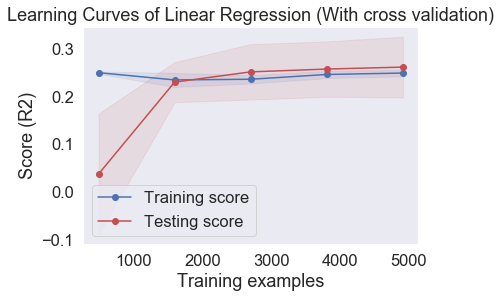

In [170]:
clf = LinearRegression() 

plot_learning_curve(LinearRegression(), 'Learning Curves of Linear Regression (With cross validation)', X_train_best, y_train)
plt.show()

As you can see, as the size of our training set grows, so does the cross-validation score at the beginning. This graph shows that the model is not overfitted yet and might still be able to grow as it has not reached a point yet where the R2 decreased. When the R2 for the testing score decreases and the training score increases, it shows that the model is too 'trained' on the training set meaning that the model starts to look for very precise combinations out of the the training set, which the testing set does not meet. When we have 1000 samples, we can obviously see that the model is underfitted. But even past 2000 the model is still underfitted. An underfitted model can be found when the training and test score converge early and stay stagnant at the same place, this shows that the cross validation score is unable to learn from more data. This can be solved by tweaking the model, for example increasing complexity.

##### Refit and test model without feature evaluation and binarized columns.

Now we try linear regression without the binarized columns, as it might not fit our model with that many binarized columns.

In [172]:
features = variables
X_temp = temp_df[features]
y = temp_df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=21)

clf = LinearRegression() 
print(train_and_evaluate(clf, X_train, X_test, y_train, y_test))

print('------------------------------------')

avg_score = np.sum(cross_val_score(clf, X_train, y_train, cv=10, scoring='r2')) / 10
print('R2 of Linear Regression with default parameters: %0.3f' % (avg_score))

R2 on training set:
0.18942584033974774
R2 on testing set:
0.08579976140556189
None
------------------------------------
R2 of Linear Regression with default parameters: 0.214


It seems that the binarized column still has a more positive effect than a negative one as the R2 does increase, this might be caused by the fact that we have too few features without them.

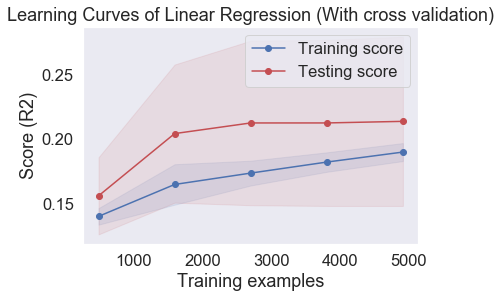

In [173]:
plot_learning_curve(LinearRegression(), 'Learning Curves of Linear Regression (With cross validation)', X_train, y_train)
plt.show()

As you can see, there is a large difference in the score when trying to predict the training set compared to when we do use the binarized categories. But even though the score is lower, the model is growing more steadily. For the learning curve with binarized categories, the scores converged and stayed stagnant, meaning the model did not like that many features, while have that little data. Making the dimensionality of the dataset too high. In this chart you can see that both scores are still growing, this means that it is still underfitted. It would be overfitted from the point where the gap between the training and test score increases. With training score increasing and test score decreasing.

## 3.2 Supervised Classification
Supervised learning algorithms are algorithms that are given both the values you want to fit your model with X, and the values they are supposed to be, y. With this, one can retrieve the accuracy score when comparing the values that were predicted and the given value y.

### 3.2.1 Naive Bayes

There are 3 different kinds of Naive Bayes algorithms:
- Multi-variate Bernoulli Naive Bayes for binary data

- Multinomial Naive Bayes for categorical data (a generalization of the Bernoulli Naive Bayes model)

- Gaussian Naive Bayes for continuous features

Naive Bayes is a collection of classification algorithms based on Bayes Theorem. It is not a single algorithm but a family of algorithms that all share a common principle, that every feature being classified is independent of the value of any other feature. So for example, a fruit may be considered to be an apple if it is red, round, and about 3″ in diameter. A Naive Bayes classifier considers each of these “features” (red, round, 3” in diameter) to contribute independently to the probability that the fruit is an apple, regardless of any correlations between features. Features, however, aren’t always independent which is often seen as a shortcoming of the Naive Bayes algorithm and this is why it’s labeled “naive”.

#### 3.2.1.1 Select the features

Unlike for regression, trying to predict an exact number is very implausable with such a high number, classification models predict a class based on the fitted features. As it has little point trying to predict the genre for example based on other information such as critic score. As we have no useful features to target, we will make one ourselves. The feature i will be making is whether something is under a specific price range, between 2 price ranges and above a specific price range. To find out what these values will be, i will have to take a look at what kind of values Global_Sales contains.

In [60]:
temp_df['Global_Sales'].describe()

count    6825.000000
mean        0.777590
std         1.963443
min         0.010000
25%         0.110000
50%         0.290000
75%         0.750000
max        82.530000
Name: Global_Sales, dtype: float64

As you can see, the average lies around 0.7.7 million, but because the data is so skewed, it is hard to split this up in 3 classes. To make this easier, we can make use of log transformation again.

In [61]:
transformed_temp_df = log_trans(temp_df[temp_df['Global_Sales'] != 0], 'Global_Sales')
transformed_temp_df['Global_Sales'].describe()

count    6825.000000
mean       -1.233406
std         1.399243
min        -4.605170
25%        -2.207275
50%        -1.237874
75%        -0.287682
max         4.413162
Name: Global_Sales, dtype: float64

With this we can create 3 classes, 1 under the 25%, 1 between 25 and 75% and 1 above 75%

In [62]:
temp_df = df.copy()

# Create a column with class in string to make it easier to differentiate when looking at dataframe.
transformed_temp_df['Sale_description'] = ['under 25%' if x < -2.207275 else 'between 25% and 75%' if x >= -2.207275 and x < -0.287682 else 'above 75%' for x in transformed_temp_df['Global_Sales']]

# Map it into 0, 1 and 2 for the machine learning algorithms
transformed_temp_df['Sale_Slice'] = transformed_temp_df['Sale_description'].map({'under 25%': 0, 'between 25% and 75%': 1, 'above 75%': 2})

transformed_temp_df.head()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Publisher_Id,Developer_Id,Other_Sales,JP_Sales,EU_Sales,...,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T,Sale_description,Sale_Slice
0,2006.0,76.0,51.0,8.0,322.0,0,0,8.45,3.77,28.96,...,0,0,1,0,0,0,0,0,above 75%,2
2,2008.0,82.0,73.0,8.3,709.0,0,0,3.29,3.79,12.76,...,0,0,1,0,0,0,0,0,above 75%,2
3,2009.0,80.0,73.0,8.0,192.0,0,0,2.95,3.28,10.93,...,0,0,1,0,0,0,0,0,above 75%,2
6,2006.0,89.0,65.0,8.5,431.0,0,0,2.88,6.50,9.14,...,0,0,1,0,0,0,0,0,above 75%,2
7,2006.0,58.0,41.0,6.6,129.0,0,0,2.84,2.93,9.18,...,0,0,1,0,0,0,0,0,above 75%,2


In [63]:
transformed_temp_df.groupby('Sale_Slice').count()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Publisher_Id,Developer_Id,Other_Sales,JP_Sales,EU_Sales,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T,Sale_description
Sale_Slice,,,,,,,,,,,,,,,,,,,,,
0,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,...,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601
1,3521,3521,3521,3521,3521,3521,3521,3521,3521,3521,...,3521,3521,3521,3521,3521,3521,3521,3521,3521,3521
2,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,...,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703


Like this we can start selected the features to predict it.

In [64]:
# Columns which we might use for our regression, besides this we also need the binarized categories.
variables = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
target = ['Sale_Slice']

With this, we are still not done. As explained in the introduction for Naive Bayes, the 3 algorithms each accept a different type of feature value. At the moment we have binary for our categories, but critic score and count etc are not the same type. To solve this we will binarize those values too, we will each change the value into quartile numbers. E.g. under the 1st quartile(25%) is a 0. To find the quartiles, we can use Describe again and repeat the process that we did for Sale_Slice. After all thise we can make use of the BernoulliNB algorithm

In [65]:
transformed_temp_df.describe()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Publisher_Id,Developer_Id,Other_Sales,JP_Sales,EU_Sales,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T,Sale_Slice
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,...,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,70.272088,28.931136,7.185626,174.722344,36.187692,370.457582,0.082677,0.064158,0.236089,...,0.138168,0.039121,0.000147,0.305055,0.136264,0.000147,0.209963,0.000147,0.348278,1.014945
std,4.211248,13.868572,19.224165,1.439942,587.428538,71.185116,379.488000,0.269871,0.287570,0.687330,...,0.345102,0.193897,0.012105,0.460464,0.343094,0.012105,0.407312,0.012105,0.476460,0.695665
min,1985.000000,13.000000,3.000000,0.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,62.000000,14.000000,6.500000,11.000000,5.000000,72.000000,0.010000,0.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2007.000000,72.000000,25.000000,7.500000,27.000000,10.000000,237.000000,0.020000,0.000000,0.060000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2011.000000,80.000000,39.000000,8.200000,89.000000,28.000000,551.000000,0.070000,0.010000,0.210000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2016.000000,98.000000,113.000000,9.600000,10665.000000,562.000000,1695.000000,10.570000,6.500000,28.960000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [66]:
transformed_temp_df['Year_of_Release_Description'] = ['under 25%' if x < 2004.000000 else 'between 25% and 50%' if x >= 2004.000000 and x < 2007.000000 else 'between 50% and 75%' if x >= 2007.000000 and x < 2011.000000 else 'above 75%' for x in transformed_temp_df['Year_of_Release']]
transformed_temp_df['Critic_Score_Description'] = ['under 25%' if x < 62.000000 else 'between 25% and 50%' if x >= 62.000000 and x < 72.000000 else 'between 50% and 75%' if x >= 72.000000 and x < 80.000000 else 'above 75%' for x in transformed_temp_df['Critic_Score']]
transformed_temp_df['Critic_Count_Description'] = ['under 25%' if x < 14.000000 else 'between 25% and 50%' if x >= 14.000000 and x < 25.000000 else 'between 50% and 75%' if x >= 25.000000 and x < 39.000000 else 'above 75%' for x in transformed_temp_df['Critic_Count']]
transformed_temp_df['User_Score_Description'] = ['under 25%' if x < 6.500000 else 'between 25% and 50%' if x >= 6.500000 and x < 7.500000 else 'between 50% and 75%' if x >= 7.500000 and x < 8.200000 else 'above 75%' for x in transformed_temp_df['User_Score']]
transformed_temp_df['User_Count_Description'] = ['under 25%' if x < 11.000000 else 'between 25% and 50%' if x >= 11.000000 and x < 27.000000 else 'between 50% and 75%' if x >= 27.000000 and x < 89.000000 else 'above 75%' for x in transformed_temp_df['User_Count']]

In [67]:
transformed_temp_df.head()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Publisher_Id,Developer_Id,Other_Sales,JP_Sales,EU_Sales,...,Rating_M,Rating_RP,Rating_T,Sale_description,Sale_Slice,Year_of_Release_Description,Critic_Score_Description,Critic_Count_Description,User_Score_Description,User_Count_Description
0,2006.0,76.0,51.0,8.0,322.0,0,0,8.45,3.77,28.96,...,0,0,0,above 75%,2,between 25% and 50%,between 50% and 75%,above 75%,between 50% and 75%,above 75%
2,2008.0,82.0,73.0,8.3,709.0,0,0,3.29,3.79,12.76,...,0,0,0,above 75%,2,between 50% and 75%,above 75%,above 75%,above 75%,above 75%
3,2009.0,80.0,73.0,8.0,192.0,0,0,2.95,3.28,10.93,...,0,0,0,above 75%,2,between 50% and 75%,above 75%,above 75%,between 50% and 75%,above 75%
6,2006.0,89.0,65.0,8.5,431.0,0,0,2.88,6.50,9.14,...,0,0,0,above 75%,2,between 25% and 50%,above 75%,above 75%,above 75%,above 75%
7,2006.0,58.0,41.0,6.6,129.0,0,0,2.84,2.93,9.18,...,0,0,0,above 75%,2,between 25% and 50%,under 25%,above 75%,between 25% and 50%,above 75%


Now that we have 4 categories for each column, we can use one hot encoding to binarize them

In [68]:
# Save the to be hot encoded columns, as the following method removes the referenced column, even if it isnt supposed to do so
saved_columns = transformed_temp_df[['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]

transformed_temp_df = pd.get_dummies(transformed_temp_df, columns=['Year_of_Release_Description'], prefix = ['Year_of_Release_Quartile'], drop_first=False)
transformed_temp_df = pd.get_dummies(transformed_temp_df, columns=['Critic_Score_Description'], prefix = ['Critic_Score_Quartile'], drop_first=False)
transformed_temp_df = pd.get_dummies(transformed_temp_df, columns=['Critic_Count_Description'], prefix = ['Critic_Count_Quartile'], drop_first=False)
transformed_temp_df = pd.get_dummies(transformed_temp_df, columns=['User_Score_Description'], prefix = ['User_Score_Quartile'], drop_first=False)
transformed_temp_df = pd.get_dummies(transformed_temp_df, columns=['User_Count_Description'], prefix = ['User_Count_Quartile'], drop_first=False)

transformed_temp_df = pd.concat([transformed_temp_df, saved_columns], axis=1, sort=False)
transformed_temp_df.head()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Publisher_Id,Developer_Id,Other_Sales,JP_Sales,EU_Sales,...,User_Score_Quartile_under 25%,User_Count_Quartile_above 75%,User_Count_Quartile_between 25% and 50%,User_Count_Quartile_between 50% and 75%,User_Count_Quartile_under 25%,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,76.0,51.0,8.0,322.0,0,0,8.45,3.77,28.96,...,0,1,0,0,0,2006.0,76.0,51.0,8.0,322.0
2,2008.0,82.0,73.0,8.3,709.0,0,0,3.29,3.79,12.76,...,0,1,0,0,0,2008.0,82.0,73.0,8.3,709.0
3,2009.0,80.0,73.0,8.0,192.0,0,0,2.95,3.28,10.93,...,0,1,0,0,0,2009.0,80.0,73.0,8.0,192.0
6,2006.0,89.0,65.0,8.5,431.0,0,0,2.88,6.50,9.14,...,0,1,0,0,0,2006.0,89.0,65.0,8.5,431.0
7,2006.0,58.0,41.0,6.6,129.0,0,0,2.84,2.93,9.18,...,0,1,0,0,0,2006.0,58.0,41.0,6.6,129.0


In [69]:
nparray = transformed_temp_df.columns
columns1 = nparray.tolist()
columns1 = [x if str.__contains__(x, 'Quartile') else None for x in nparray]
columns1 = [x for x in columns1 if x is not None]
columns1

['Year_of_Release_Quartile_above 75%',
 'Year_of_Release_Quartile_between 25% and 50%',
 'Year_of_Release_Quartile_between 50% and 75%',
 'Year_of_Release_Quartile_under 25%',
 'Critic_Score_Quartile_above 75%',
 'Critic_Score_Quartile_between 25% and 50%',
 'Critic_Score_Quartile_between 50% and 75%',
 'Critic_Score_Quartile_under 25%',
 'Critic_Count_Quartile_above 75%',
 'Critic_Count_Quartile_between 25% and 50%',
 'Critic_Count_Quartile_between 50% and 75%',
 'Critic_Count_Quartile_under 25%',
 'User_Score_Quartile_above 75%',
 'User_Score_Quartile_between 25% and 50%',
 'User_Score_Quartile_between 50% and 75%',
 'User_Score_Quartile_under 25%',
 'User_Count_Quartile_above 75%',
 'User_Count_Quartile_between 25% and 50%',
 'User_Count_Quartile_between 50% and 75%',
 'User_Count_Quartile_under 25%']

With this we have all the columns we need to fit our model and our target feature

In [70]:
columns2[:5]

['Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC']

In [71]:
# columns 1 includes the just binarized columns and columns 2 includes the previouse binarized columns in chapter 3.3.
features = columns1 + columns2
target = ['Sale_Slice']
all_columns = features + target
#Combine the 2 columns
columns = columns1 + columns2
transformed_temp_df = transformed_temp_df[all_columns]
transformed_temp_df.head()
all_columns

['Year_of_Release_Quartile_above 75%',
 'Year_of_Release_Quartile_between 25% and 50%',
 'Year_of_Release_Quartile_between 50% and 75%',
 'Year_of_Release_Quartile_under 25%',
 'Critic_Score_Quartile_above 75%',
 'Critic_Score_Quartile_between 25% and 50%',
 'Critic_Score_Quartile_between 50% and 75%',
 'Critic_Score_Quartile_under 25%',
 'Critic_Count_Quartile_above 75%',
 'Critic_Count_Quartile_between 25% and 50%',
 'Critic_Count_Quartile_between 50% and 75%',
 'Critic_Count_Quartile_under 25%',
 'User_Score_Quartile_above 75%',
 'User_Score_Quartile_between 25% and 50%',
 'User_Score_Quartile_between 50% and 75%',
 'User_Score_Quartile_under 25%',
 'User_Count_Quartile_above 75%',
 'User_Count_Quartile_between 25% and 50%',
 'User_Count_Quartile_between 50% and 75%',
 'User_Count_Quartile_under 25%',
 'Platform_3DS',
 'Platform_DC',
 'Platform_DS',
 'Platform_GBA',
 'Platform_GC',
 'Platform_PC',
 'Platform_PS',
 'Platform_PS2',
 'Platform_PS3',
 'Platform_PS4',
 'Platform_PSP',
 '

As i left the empty values at the beginning, we still have to remove these to be able to fit the model

#### 3.2.1.2 Set features and target

In [72]:
# Set features, Set at the top, repeated here to make it clearer.
all_features = features
X = transformed_temp_df[all_features]
X.head()

,Year_of_Release_Quartile_above 75%,Year_of_Release_Quartile_between 25% and 50%,Year_of_Release_Quartile_between 50% and 75%,Year_of_Release_Quartile_under 25%,Critic_Score_Quartile_above 75%,Critic_Score_Quartile_between 25% and 50%,Critic_Score_Quartile_between 50% and 75%,Critic_Score_Quartile_under 25%,Critic_Count_Quartile_above 75%,Critic_Count_Quartile_between 25% and 50%,...,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
6,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
# Set target
y = transformed_temp_df['Sale_Slice']
y.head()

0    2
2    2
3    2
6    2
7    2
Name: Sale_Slice, dtype: int64

#### 3.2.1.3 Split into training and testing sets

In [74]:
# Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

#### 3.2.1.4 Fit and Test Model

In [75]:
#Import Bernoulli naive bayes algorithm
from sklearn.naive_bayes import BernoulliNB

# Readded these methods for classification algorithms, as there were small differences.

# Returns accuracy score on training and test set, additionally returns classification report and the confusion matrix for the test predictions. 
# It will also save the accuracy and classification report in the df scores
def train_and_evaluate(clf, X_train, X_test, y_train, y_test, classifiername='unknown'):
    
    clf.fit(X_train, y_train)

    print("Accuracy on training set:")
    train_accuracy = clf.score(X_train, y_train)
    print(train_accuracy)
    print("Accuracy on testing set:")
    test_accuracy = clf.score(X_test, y_test)
    print(test_accuracy)
    
    y_pred = clf.predict(X_test)
    
    print("Classification Report:")
    print(m.classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(m.confusion_matrix(y_test, y_pred))
    
    
    y_pred_train = clf.predict(X_train)
    
    # Append training set classification report to scores df
    clf_rep = m.precision_recall_fscore_support(y_train, y_pred_train)
    out_dict = { "accuracy" : train_accuracy
                ,"precision" :clf_rep[0].round(2)
                ,"recall" : clf_rep[1].round(2)
                ,"f1-score" : clf_rep[2].round(2)
                }
    out_df = pd.DataFrame(out_dict, index = clf.classes_)
    avg_tot = (out_df.apply(lambda x: round(x.mean(), 2) if x.name!="support" else  round(x.sum(), 2)).to_frame().T)
    

    classification_report = avg_tot.values.tolist()
    scores.loc[classifiername+'Training']= classification_report[0]

    # Append test set classification report to scores df
    clf_rep = m.precision_recall_fscore_support(y_test, y_pred)
    out_dict = {
                 "accuracy" : test_accuracy
                ,"precision" :clf_rep[0].round(2)
                ,"recall" : clf_rep[1].round(2)
                ,"f1-score" : clf_rep[2].round(2)
                }
    out_df = pd.DataFrame(out_dict, index = clf.classes_)
    avg_tot = (out_df.apply(lambda x: round(x.mean(), 2) if x.name!="support" else  round(x.sum(), 2)).to_frame().T)
    classification_report = avg_tot.values.tolist()
    scores.loc[classifiername+'Test'] = classification_report[0]
    
# Define a function for plotting learning curves:
# Learning curves show the learning rate of the training and 
# cross-validation set over training examples (m).
def plot_learning_curve(estimator, title, X, y, kfolds=10):    
    # Fit to get parameters for the learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator,
        X, y, cv=kfolds, n_jobs=-1)
    
    # Get mean and standard deviation for training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    # Get mean and standard deviation for cross-validation scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Setup chart
    plt.figure()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score (accuracy)')
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='Testing score')
    plt.legend(loc='best')
    print(test_scores)

    return plt

In [76]:
clf = BernoulliNB()

train_and_evaluate( clf, X_train, X_test, y_train, y_test, "BernoulliNB")

Accuracy on training set:
0.6135531135531136
Accuracy on testing set:
0.5904761904761905
Classification Report:
             precision    recall  f1-score   support

          0       0.58      0.36      0.44       319
          1       0.62      0.69      0.65       694
          2       0.55      0.60      0.57       352

avg / total       0.59      0.59      0.58      1365

Confusion Matrix:
[[114 170  35]
 [ 72 481 141]
 [ 10 131 211]]


A total of 145 columns

[[0.58177827 0.57943925 0.57943925]
 [0.60757409 0.59538208 0.59153381]
 [0.62184413 0.60912589 0.59208356]
 [0.61306257 0.60417812 0.60142936]
 [0.61031833 0.59593183 0.60197911]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Wesley\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

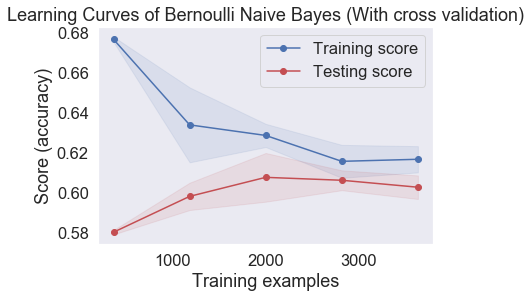

In [77]:
plot_learning_curve(clf, 'Learning Curves of Bernoulli Naive Bayes (With cross validation)',  X_train, y_train, 3)

Here you see the training score and the testing score slowly converging, but then seperating again. Meaing that it started overfitting from around 2000 training examples

[[0.65957447 0.57446809 0.70212766 0.59574468 0.76595745 0.59574468
  0.65957447 0.53191489 0.70212766 0.76595745 0.68085106 0.5106383
  0.55319149 0.63829787 0.53191489 0.5106383  0.65957447 0.4893617
  0.59574468 0.65957447 0.46808511 0.65957447 0.74468085 0.59574468
  0.72340426 0.63829787 0.57446809 0.4893617  0.65957447 0.57446809
  0.61702128 0.65217391 0.60869565 0.60869565 0.54347826 0.56521739
  0.54347826 0.58695652 0.65217391 0.65217391 0.60869565 0.60869565
  0.67391304 0.54347826 0.5        0.52173913 0.47826087 0.54347826
  0.63043478 0.5        0.45652174 0.58695652 0.5        0.58695652
  0.58695652 0.56521739 0.69565217 0.56521739 0.67391304 0.63043478
  0.60869565 0.60869565 0.5        0.76086957 0.54347826 0.60869565
  0.60869565 0.68888889 0.55555556 0.64444444 0.51111111 0.53333333
  0.62222222 0.53333333 0.51111111 0.46666667 0.6        0.68888889
  0.66666667 0.48888889 0.66666667 0.51111111 0.54545455 0.61363636
  0.59090909 0.63636364 0.61363636 0.61363636 0.61

<module 'matplotlib.pyplot' from 'C:\\Users\\Wesley\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

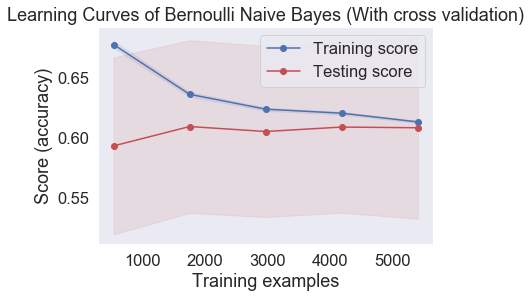

In [78]:
plot_learning_curve(clf, 'Learning Curves of Bernoulli Naive Bayes (With cross validation)',  X_train, y_train, 120)

Here you see the testing score and training score converging again, but the testig score is quite stagnant, meaning that more data does not effect it too much, thus being underfitted. The std is also quite large as there are just that many folds.

### 3.2.2 Decision trees

Decision trees is a supervised learning algorithm that can be used for classification and regression. In this case we will be using decision trees for classification. A decision tree is a tree where each node represents a feature(attribute), each link(branch) represents a decision(rule) and each leaf represents an outcome(categorical or continues value). E.g. the node is critic score, it branches off in critic scores above 9 and under 9 and the outcome would be 'well received' and 'badly received' respectively. This is done repeatedly until with many nodes and branches to fit the model. How much you fit the model can easily be affected by the fact that you can specify what the depth of the tree should be. E.g. before the outcome 'well received' you could also check for the user score and if the user score also has an outcome 'well received' then you could give the outcome as a whole 'well received in general' If you were to limit the depth to 1, it would not check whether it was well received by the users but only by the critics. Leaving a large margin of error. If you were to make it too deep, it would become very accurate for your training data, as your training data has each combination of values that your decision tree is looking for. But this would not work for other sets then, as the tree is looking for a combination of values exactly as it trained for.

#### 3.2.2.1 Feature Selection

In [79]:
temp_df = df.copy()
transformed_temp_df = log_trans(temp_df[temp_df['Global_Sales'] != 0], 'Global_Sales')

# Create a column with class in string to make it easier to differentiate when looking at dataframe.
transformed_temp_df['Sale_description'] = ['under 25%' if x < -2.207275 else 'between 25% and 75%' if x >= -2.207275 and x < -0.287682 else 'above 75%' for x in transformed_temp_df['Global_Sales']]

# Map it into 0, 1 and 2 for the machine learning algorithms
transformed_temp_df['Sale_Slice'] = transformed_temp_df['Sale_description'].map({'under 25%': 0, 'between 25% and 75%': 1, 'above 75%': 2})

# Columns that we want to use to fit our model and the target. It is not necessary to binarize the feature columns as decision trees work regardless.
# It is still required to use the 3 different classes for the target though..
features = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Publisher_Id', 'Developer_Id']
target = ['Sale_Slice']
features = features + columns2
all_columns = features + target
transformed_temp_df = transformed_temp_df[all_columns]
transformed_temp_df.describe()
transformed_temp_df.groupby('Sale_Slice').count()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Publisher_Id,Developer_Id,Platform_3DS,Platform_DC,Platform_DS,...,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
Sale_Slice,,,,,,,,,,,,,,,,,,,,,
0,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,...,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601
1,3521,3521,3521,3521,3521,3521,3521,3521,3521,3521,...,3521,3521,3521,3521,3521,3521,3521,3521,3521,3521
2,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,...,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703


#### 3.2.2.2 Set features and target

In [80]:
# Set features.
X = transformed_temp_df[features]

In [81]:
# Set target
y = transformed_temp_df['Sale_Slice']

#### 3.2.2.3 Scale features

In [82]:
scaler = MinMaxScaler([0, 1])
X_scaled = scaler.fit_transform(X)
transformed_temp_df.head()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Publisher_Id,Developer_Id,Platform_3DS,Platform_DC,Platform_DS,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T,Sale_Slice
0,2006.0,76.0,51.0,8.0,322.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,2
2,2008.0,82.0,73.0,8.3,709.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,2009.0,80.0,73.0,8.0,192.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,2
6,2006.0,89.0,65.0,8.5,431.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2
7,2006.0,58.0,41.0,6.6,129.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


#### 3.2.2.4 Split into training and testing sets

In [83]:
# Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

#### 3.2.2.5 Fit and Test Model

In [84]:
#Import decision trees and random forest algorithms
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

C:\Users\Wesley\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Lets first try out Decision Trees

In [85]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 5)
train_and_evaluate(clf, X_train, X_test, y_train, y_test, 'DecisionTree')

Accuracy on training set:
0.6487179487179487
Accuracy on testing set:
0.6366300366300366
Classification Report:
             precision    recall  f1-score   support

          0       0.73      0.37      0.49       319
          1       0.66      0.69      0.67       694
          2       0.57      0.76      0.66       352

avg / total       0.65      0.64      0.63      1365

Confusion Matrix:
[[119 179  21]
 [ 34 481 179]
 [ 10  73 269]]


[[0.59597806 0.6084172  0.63336389 0.64802933 0.61136572]
 [0.63528336 0.61390668 0.61411549 0.62786434 0.60861595]
 [0.62705667 0.63403477 0.60953254 0.64711274 0.60311641]
 [0.61151737 0.6294602  0.64069661 0.62694775 0.61411549]
 [0.64533821 0.63952425 0.63061412 0.63886343 0.64252979]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Wesley\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

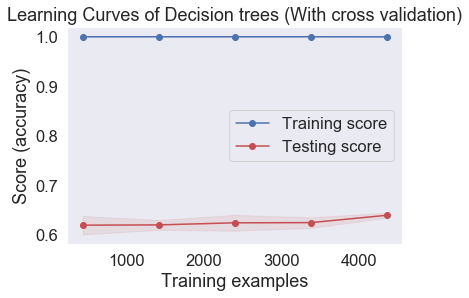

In [86]:
clf = tree.DecisionTreeClassifier()

plot_learning_curve(clf, 'Learning Curves of Decision trees (With cross validation)',  X_train, y_train, 5)

Here you see that the training score is a lot higher than the testing score, the reason for this is because the model is fitted to the extreme to our training set as the max-depth of the decision tree it None. This means it will fit the model on exact combination of features, which the training set meets, while the test set does not. This causes the large difference between the 2 scores.

[[0.61974406 0.66605672 0.64069661 0.65536205 0.63428048]
 [0.64899452 0.65416285 0.65352887 0.64802933 0.65444546]
 [0.63254113 0.66056725 0.65261228 0.65536205 0.65536205]
 [0.63711152 0.66056725 0.65811182 0.63153071 0.62786434]
 [0.63711152 0.64775846 0.65719523 0.63519707 0.64344638]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Wesley\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

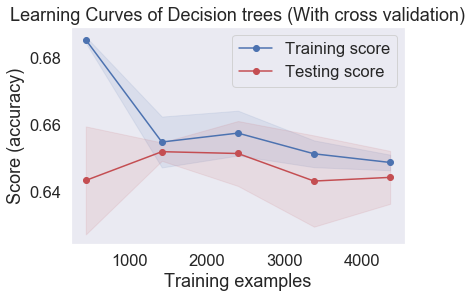

In [87]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 5)

plot_learning_curve(clf, 'Learning Curves of Decision trees (With cross validation)',  X_train, y_train, 5)

Here you can see an extreme example of underfitting. You can see that the accuracy of the training and testing score stagnate on a bad score. The reason for this might be because the data is too little, too little features or that the model should be tweaked differently. The current way it is tweaked, is that no matter how much data you add, it will never learn from it, as the decision tree depth is only 1 depth, meaning the cl.

### 3.2.3 k-Nearest Neighbors

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data).

#### 3.2.3.1 Feature selection

For the features, we can make use of the same df as the one for Decision trees.

In [88]:
transformed_temp_df.head()

,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Publisher_Id,Developer_Id,Platform_3DS,Platform_DC,Platform_DS,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T,Sale_Slice
0,2006.0,76.0,51.0,8.0,322.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,2
2,2008.0,82.0,73.0,8.3,709.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,2009.0,80.0,73.0,8.0,192.0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,2
6,2006.0,89.0,65.0,8.5,431.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2
7,2006.0,58.0,41.0,6.6,129.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


#### 3.2.3.2 Set features and target, Scale features

Again, we can use the same one as we did for decision trees.

#### 3.2.3.3 Split into train and test set

In [89]:
# We repeat this so we can make changes to the Test size if needed
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

#### 3.2.3.4 Fit and Test Model

In [90]:
# import the k-Nearest Neighbour algorithm
from sklearn.neighbors import KNeighborsClassifier

In [91]:
clf = KNeighborsClassifier()
train_and_evaluate(clf, X_train, X_test, y_train, y_test, 'KNN')

Accuracy on training set:
0.7327838827838827
Accuracy on testing set:
0.5992673992673992
Classification Report:
             precision    recall  f1-score   support

          0       0.53      0.38      0.44       319
          1       0.60      0.74      0.66       694
          2       0.65      0.52      0.58       352

avg / total       0.60      0.60      0.59      1365

Confusion Matrix:
[[120 184  15]
 [ 94 515  85]
 [ 12 157 183]]


[[0.56386861 0.54661792 0.55494505 0.54395604 0.56593407 0.5970696
  0.53663004 0.58899083 0.56880734 0.53577982]
 [0.59854015 0.58683729 0.58424908 0.57692308 0.53113553 0.60989011
  0.5952381  0.55779817 0.57798165 0.59082569]
 [0.59489051 0.58500914 0.62820513 0.57326007 0.54761905 0.61721612
  0.6007326  0.6        0.59633028 0.6146789 ]
 [0.58394161 0.55210238 0.64102564 0.5989011  0.56593407 0.63736264
  0.6043956  0.59082569 0.59816514 0.63119266]
 [0.61313869 0.57404022 0.64102564 0.61721612 0.54212454 0.62454212
  0.61538462 0.59449541 0.60183486 0.61100917]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Wesley\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

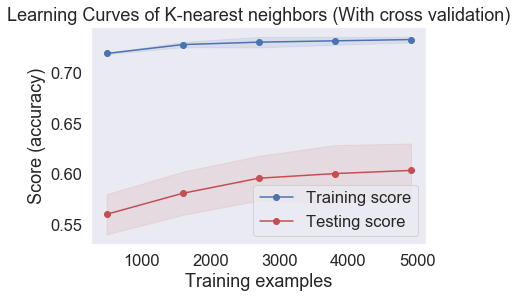

In [92]:
clf = KNeighborsClassifier()

plot_learning_curve(clf, 'Learning Curves of K-nearest neighbors (With cross validation)',  X_train, y_train, 10)

Here you see an overfitted model. The gap between the training and test scores is very large. The test scores also starts to stagnate on 60%

[[0.52007299 0.53747715 0.53479853 0.52564103 0.52747253 0.53296703
  0.53479853 0.53394495 0.53577982 0.5412844 ]
 [0.58211679 0.55575868 0.57142857 0.55128205 0.57509158 0.56043956
  0.56593407 0.56697248 0.5706422  0.57614679]
 [0.6149635  0.57769653 0.58058608 0.58058608 0.58791209 0.6025641
  0.57509158 0.58899083 0.57981651 0.6       ]
 [0.60766423 0.59597806 0.61355311 0.5952381  0.60805861 0.60989011
  0.57692308 0.60733945 0.58165138 0.61100917]
 [0.61313869 0.57952468 0.61538462 0.61355311 0.63736264 0.62454212
  0.59157509 0.6293578  0.59633028 0.61834862]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Wesley\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

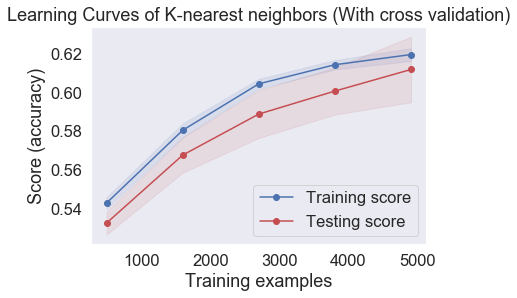

In [93]:
clf = KNeighborsClassifier(n_neighbors=100)

plot_learning_curve(clf, 'Learning Curves of K-nearest neighbors (With cross validation)',  X_train, y_train, 10)

This is a nice examle of a nicely growing model, both are increasing steadily and still probably will as more data is added, meaning it is slightly underfitted at the moment. But you notice the test scores starting to grow more slowly than the training scores, meaning it will soon reach a point where only training score increases while testing decreases, which would be the amount of data that you want to use as you are overfitting past that point.

### 3.2.4 SVM

A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes. 
SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes

Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set

a hyperplane is a line that linearly separates and classifies a set of data

The distance between the hyperplane and the nearest data point from either set is known as the margin. The goal is to choose a hyperplane with the greatest possible margin between the hyperplane and any point within the training set, giving a greater chance of new data being classified correctly

#### 3.2.4.1 Feature Selection, Set features and target, Scale features and splitting into training and test set

We can use the same variables as we had used for KNN

#### 3.2.4.2 Fit and test models

In [94]:
# Import Libraries
from sklearn.svm import SVC

Kernel: linear
Accuracy on training set:
0.6776556776556777
Accuracy on testing set:
0.6586080586080586
Classification Report:
             precision    recall  f1-score   support

          0       0.73      0.39      0.51       319
          1       0.63      0.84      0.72       694
          2       0.72      0.55      0.62       352

avg / total       0.68      0.66      0.64      1365

Confusion Matrix:
[[123 187   9]
 [ 44 582  68]
 [  1 157 194]]
[[0.64781022 0.62340037 0.65750916 0.5989011  0.64835165 0.66117216
  0.65750916 0.6440367  0.63302752 0.65321101]
 [0.68065693 0.63071298 0.68681319 0.66849817 0.65018315 0.66849817
  0.65018315 0.63853211 0.6587156  0.6733945 ]
 [0.68065693 0.65265082 0.70879121 0.65201465 0.66666667 0.68315018
  0.64285714 0.65321101 0.67155963 0.68440367]
 [0.68430657 0.65447898 0.70695971 0.64285714 0.66117216 0.67765568
  0.64468864 0.65137615 0.67522936 0.67522936]
 [0.68613139 0.65996344 0.71428571 0.64468864 0.66666667 0.68131868
  0.63919414 

C:\Users\Wesley\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Wesley\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Wesley\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[0.51642336 0.51736746 0.51831502 0.51831502 0.51831502 0.51831502
  0.51831502 0.51743119 0.51743119 0.51743119]
 [0.51642336 0.51736746 0.51831502 0.51831502 0.51831502 0.51831502
  0.51831502 0.51743119 0.51743119 0.51743119]
 [0.51642336 0.51736746 0.51831502 0.51831502 0.51831502 0.51831502
  0.51831502 0.51743119 0.51743119 0.51743119]
 [0.51642336 0.51736746 0.51831502 0.51831502 0.51831502 0.51831502
  0.51831502 0.51743119 0.51743119 0.51743119]
 [0.51642336 0.51736746 0.51831502 0.51831502 0.51831502 0.51831502
  0.51831502 0.51743119 0.51743119 0.51743119]]
------------------------------------------------------------------------------------------------
 
Kernel: rbf
Accuracy on training set:
0.6468864468864469
Accuracy on testing set:
0.6285714285714286
Classification Report:
             precision    recall  f1-score   support

          0       0.69      0.30      0.42       319
          1       0.59      0.92      0.72       694
          2       0.83      0.36      0.5

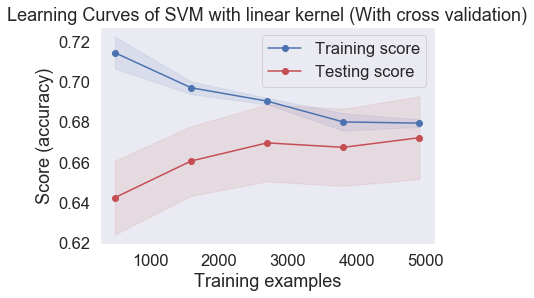

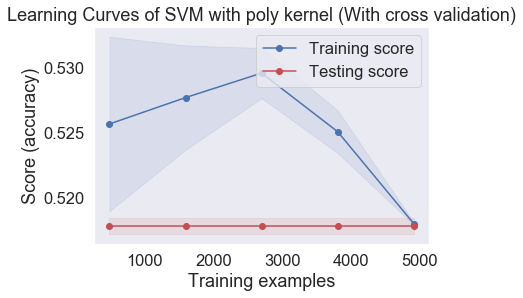

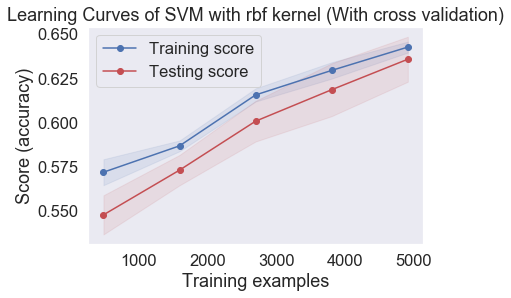

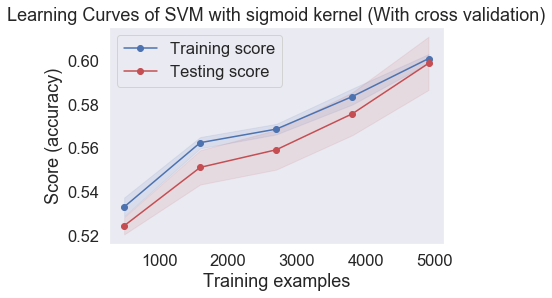

In [95]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] # precomputed kernel is not used https://stats.stackexchange.com/questions/92101/prediction-with-scikit-and-an-precomputed-kernel-svm
for k in kernels:
    clf = SVC(kernel=k)
    print('Kernel: ' + k)
    train_and_evaluate(clf, X_train, X_test, y_train, y_test,'SVM_' + k )
    title = 'Learning Curves of SVM with ' + k + ' kernel (With cross validation)'
    plot_learning_curve(clf, title,  X_train, y_train, 10)
    print('------------------------------------------------------------------------------------------------')
    print(' ')

The 3 kernels besides the poly kernel are underfitted, it is indicated that it can still continue growing as the test score has not shown a decrease yet and the gap between test and training set has not increased yet. For the poly kernel, there seems to be in error, as the test scores do not change at all.

## 3.3 Unsupervised Learning

Unsupervised learning is the opposite of supervised learning. Instead of fitting your model with also *y* to get the accuracy, you dont give a y, but only fit with X. The goal is to learn more about your data, for example look for groups in your data.

An example would be Kmeans, To use Kmeans you have to define how many clusters there are in your given training data, it then starts clustering data that are similar till there are as many as were given when defining the classifier.

## 3.4 Accuracy, Precision, Recall, f1 score and confusion matrix

In [96]:
scores

,Accuracy,Precision,Recall,F1 Score
BernoulliNBTraining,0.61,0.60,0.58,0.59
BernoulliNBTest,0.59,0.58,0.55,0.55
DecisionTreeTraining,0.65,0.66,0.63,0.63
DecisionTreeTest,0.64,0.65,0.61,0.61
KNNTraining,0.73,0.74,0.69,0.71
KNNTest,0.60,0.59,0.55,0.56
SVM_linearTraining,0.68,0.70,0.62,0.64
SVM_linearTest,0.66,0.69,0.59,0.62
SVM_polyTraining,0.52,0.17,0.33,0.23
SVM_polyTest,0.51,0.17,0.33,0.22


Description of the metrics in classification report and the confusion matrix:

Accuracy: How many values were correctly predicted?

Recall: Of all the sale values less than 25% how many were correctly predicted? The higher the Recall the more you're avoiding false negatives
E.g. for target 2 (above 75%/ 3rd quartile of the sales) of all the target 2's, only 61% percent were predicted to be target 2

Precision: Of all the values predicted to be less than 25% how many were actually 25%? The higher the precision, the more you're avoiding false positives
E.g. for target 2 (above 75%/ 3rd quartile of the sales) of all the predictions that predicted it to be target 2, only 50% was actually precision 2

f1-score: Combines precision and recall, as both often matter
F1 = 2 x P X R / (P / R)
If F1 is low, then that means either P or R or both is low, as it drags the score down when you multiple 2 x P x R.
If F1 is high, then that means both P and R are high, as if even 1 was low, then the score would've been dragged down.

Confusion Matrix: Matrix that contains the values how many times a certain value was predicted for the true value.
E.g. 
    1  2  3
1  22 10  13
2 xxxxxxxxxxxxxx
3 xxxxxxxxxx
For the values that were target 1, 22 got properly predicted to be target 1, 10 target 1's got wrongly predicted to be a 2 and 13 target 1's got wrongly predicted to be target 3

### 3.4.1 Precision or Recall?

The most goal of our project is to predict whether a game will be successful based on given features such as genre. For this, the most important would be precision. 

The reason for this is because it does not matter if we predict something will fail and it will succeed, because then we would just try something else. 
E,g. of all the values that were actually above the 75% of global sales / success, only 50% (0.5 recall) were predicted to be above 75%, meaning that if you were to predict it would sell worse and then it would sell for more, it would only be good.

But if we were to predict something were to succeed and it failed (which is more likely with a low precision), then we would make a bad business decision and suffer large losses.
E.g. of all the values that were predicted to be above 75% (which we will be basing our business choices on), only 50% (0.5% precision) were actually above 75%, meaning that if you had trusted the prediction, there would be a 50% chance that you got less than you expected.

## 4 Conclusion

### 4.1 Scores per algorithm

In [97]:
scores

,Accuracy,Precision,Recall,F1 Score
BernoulliNBTraining,0.61,0.60,0.58,0.59
BernoulliNBTest,0.59,0.58,0.55,0.55
DecisionTreeTraining,0.65,0.66,0.63,0.63
DecisionTreeTest,0.64,0.65,0.61,0.61
KNNTraining,0.73,0.74,0.69,0.71
KNNTest,0.60,0.59,0.55,0.56
SVM_linearTraining,0.68,0.70,0.62,0.64
SVM_linearTest,0.66,0.69,0.59,0.62
SVM_polyTraining,0.52,0.17,0.33,0.23
SVM_polyTest,0.51,0.17,0.33,0.22


As we focus the most on accuracy and precision, according to the scores that we got from each algorithm. Our best bet is to use **SVM_linear** for the **highest accuracy** of **66%** and a precision of 69% which is only 2% lower precision than the highest precision or use the **SVM_rbf** for the **highest precision** of 70% and a 3% lower accuracy than the highest of **63%**, as that gave us the highest accuracy and precision.
The most useful would probably be the SVM linear kernel one, as accuracy is important when predicting the right one, if you were to predict the wrong one, it wouldnt matter how high your precision is.

This might change as the amount of features change (Currently out features were very few and missed many important features that are important to a game E.g. marketing) or data amount changes.

### 4.2 Hypotheses

The hypotheses were:
    
I will apply the learned algorithms to learn more about following hypotheses:
    1. Does the critic score, User score or a combination of those have a causal relationship with game sales?
    2. Does the number of users and critics have a causal relationship with game sales? 
    3. Is there a difference in the causal relationship between platform/genre/publisher/developer and game sales in different countries?
    4. Does the platform, genre, publisher, developer, release year, ESRB rating(age rating E.g. Teen) or a combination of those have a causal relationship with game sales?
  
These hypotheses didn not really suit the goal of this machine learning project, as i was supposed to show my knowledge of the algorithms and not make a statistical analyses.
Thus these questions were left behind, answering these only required a T-test and not a model. 

But if the goal in general was 'Are you able to predict whether a game would be successful based on the given features?'. Then it it would be a no, Many models were underfitted because of a lack of data and the amount of features were too few. This made the accuracy score and other metrics too low (around 70%) which should not be high enough to base your business decisions on.